# 1) Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Model Selection and Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler

# 2) Reading Data

In [2]:
df_raw = pd.read_csv("churn2.csv")
df = df_raw.copy()
df_copy = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# 3) Exploratory Data Analysis

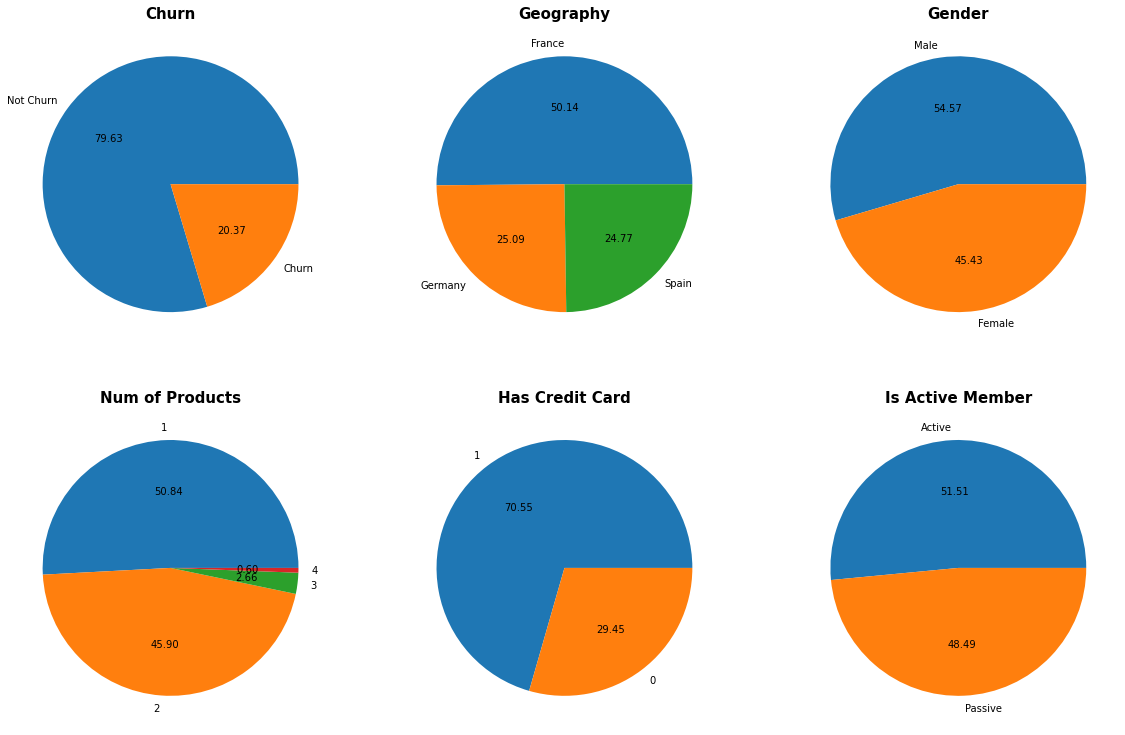

In [4]:
plt.subplots(figsize = (20,20))

plt.subplot(3, 3, 1)
label = ["Not Churn", "Churn"]
plt.pie(df_raw.Exited.value_counts(), labels=label, autopct='%.2f')
plt.title("Churn", fontsize = 15, fontweight = "bold")


plt.subplot(3, 3, 2)
label = ["France", "Germany", "Spain"]
plt.pie(df_raw.Geography.value_counts(), labels=label, autopct='%.2f')
plt.title("Geography", fontsize = 15, fontweight = "bold")

plt.subplot(3, 3, 3)
label = ["Male", "Female"]
plt.pie(df_raw.Gender.value_counts(), labels=label, autopct='%.2f')
plt.title("Gender", fontsize = 15, fontweight = "bold")

plt.subplot(3, 3, 4)
label = [1,2,3,4]
plt.pie(df_raw.NumOfProducts.value_counts(), labels=label, autopct='%.2f')
plt.title("Num of Products", fontsize = 15, fontweight = "bold")

plt.subplot(3, 3, 5)
label = [1,0]
plt.pie(df.HasCrCard.value_counts(), labels=label, autopct='%.2f')
plt.title("Has Credit Card", fontsize = 15, fontweight = "bold")

plt.subplot(3, 3, 6)
label = ["Active","Passive"]
plt.pie(df.IsActiveMember.value_counts(), labels=label, autopct='%.2f')
plt.title("Is Active Member",fontsize = 15, fontweight = "bold")
plt.show();

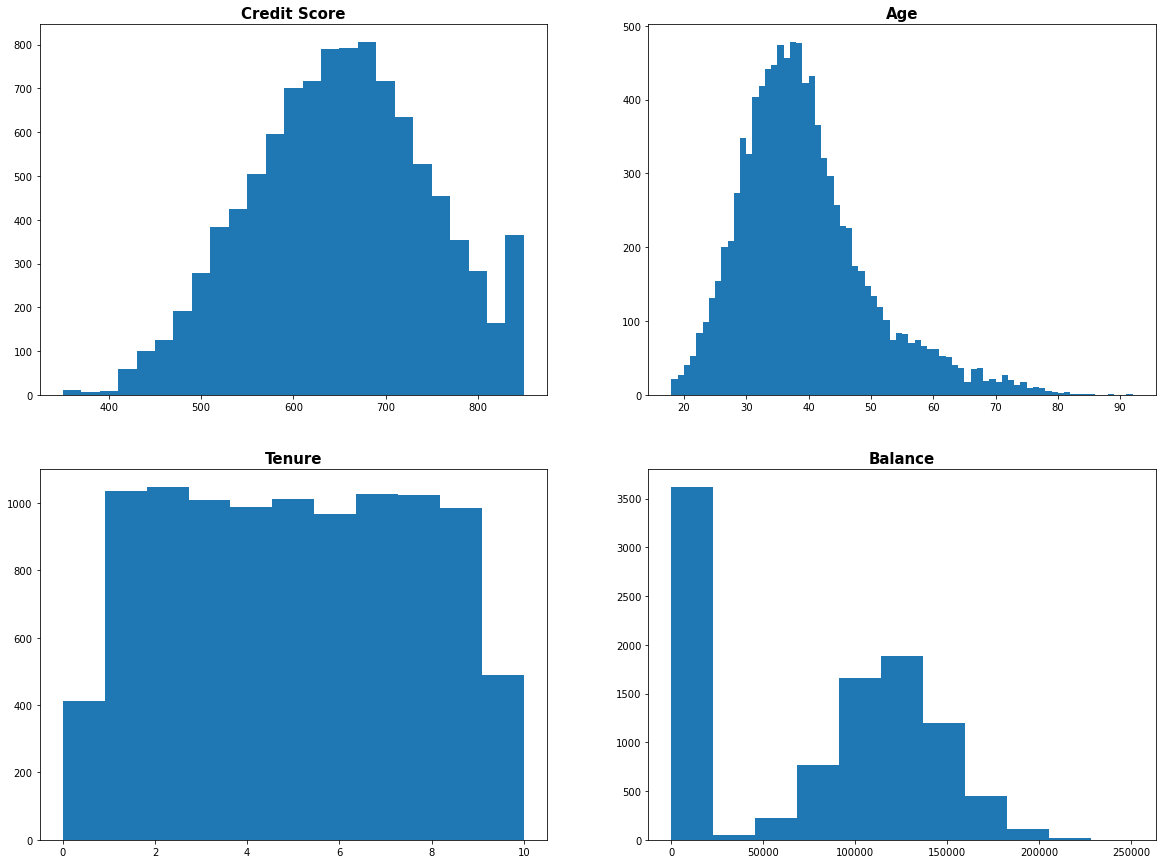

In [5]:
plt.subplots(figsize = (20,15))

plt.subplot(2, 2, 1)
plt.hist(df.CreditScore, bins=25)
plt.title("Credit Score",fontsize = 15, fontweight = "bold")

plt.subplot(2, 2, 2)
plt.hist(df.Age, bins=74)
plt.title("Age", fontsize = 15, fontweight = "bold")

plt.subplot(2, 2, 3)
plt.hist(df.Tenure, bins=11)
plt.title("Tenure", fontsize = 15, fontweight = "bold")

plt.subplot(2, 2, 4)
plt.hist(df.Balance, bins=11)
plt.title("Balance", fontsize = 15, fontweight = "bold")
plt.show()

In [6]:
df_copy["Credit_Score_Group"] = pd.qcut(df_copy['CreditScore'], q = 4, labels=[1,2,3,4])
df_copy["Age_Group"] = df.Age.apply(lambda x: "18-25" if (x <= 25) 
                                    else "26-35" if (x > 25) and (x <= 35)
                                    else "36-50" if (x > 35) and (x <= 50)
                                    else "50+" if (x > 50)
                                    else 0)
df_copy["Balance_Group"] = df.Balance.apply(lambda x: 1 if (x == 0)
                                            else 2 if (x > 0) and (x <= 120000)
                                            else 3 if (x > 120000)
                                            else 0)
df_copy["Tenure_Group"] = pd.qcut(df_copy["Tenure"], 4, labels = [1,2,3,4])
df_copy["Estimated_Salary_Group"] = pd.qcut(df_copy['EstimatedSalary'], q = 4, labels=[1,2,3,4])

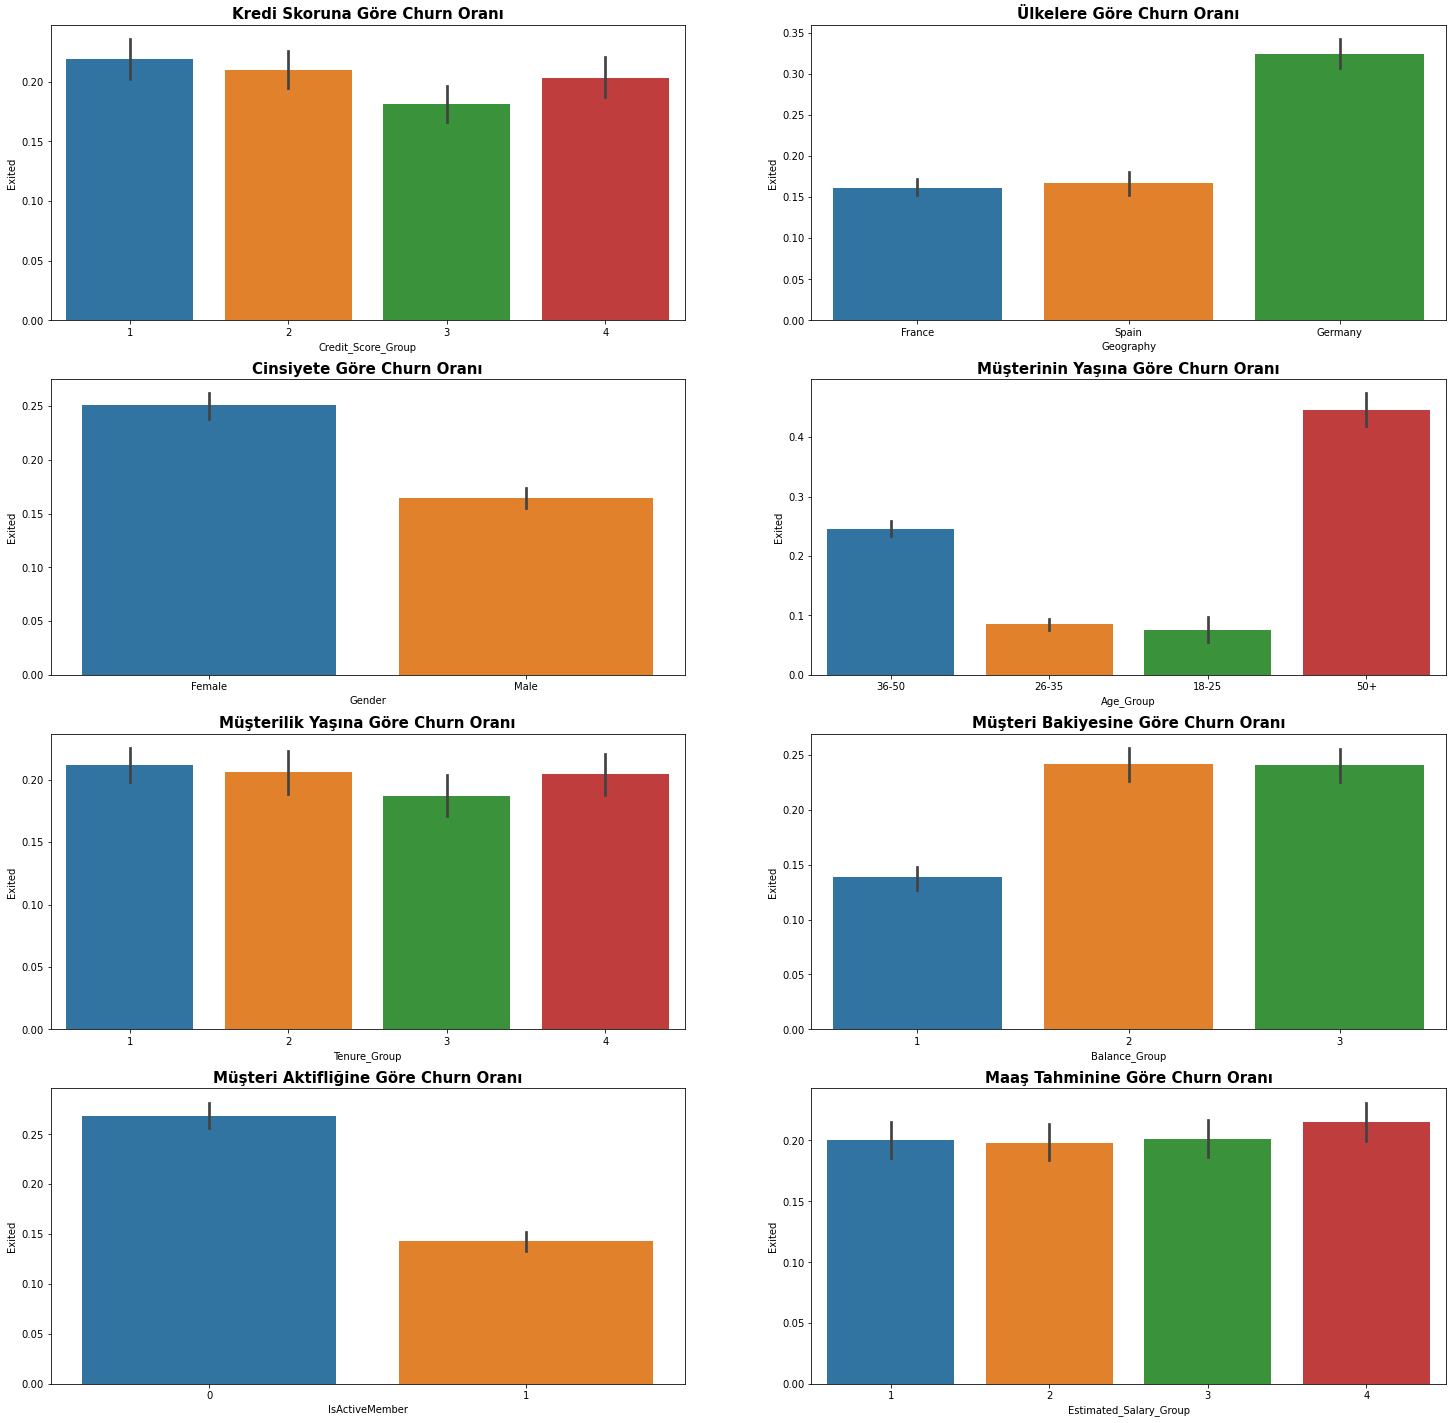

In [7]:
plt.subplots(figsize = (25,25))
plt.subplot(4, 2, 1)
sns.barplot(x = 'Credit_Score_Group', y = 'Exited',data = df_copy)
plt.title("Kredi Skoruna Göre Churn Oranı", fontsize = 15, fontweight = "bold") 

plt.subplot(4, 2, 2)
sns.barplot(x = 'Geography', y = 'Exited',data = df_copy)
plt.title("Ülkelere Göre Churn Oranı", fontsize = 15, fontweight = "bold") 

plt.subplot(4, 2, 3)
sns.barplot(x = 'Gender', y = 'Exited',data = df_copy)
plt.title("Cinsiyete Göre Churn Oranı", fontsize = 15, fontweight = "bold") 

plt.subplot(4, 2, 4)
sns.barplot(x = 'Age_Group', y = 'Exited',data = df_copy)
plt.title("Müşterinin Yaşına Göre Churn Oranı", fontsize = 15, fontweight = "bold") 

plt.subplot(4, 2, 5)
sns.barplot(x = 'Tenure_Group', y = 'Exited',data = df_copy)
plt.title("Müşterilik Yaşına Göre Churn Oranı", fontsize = 15, fontweight = "bold")

plt.subplot(4, 2, 6)
sns.barplot(x = 'Balance_Group', y = 'Exited',data = df_copy)
plt.title("Müşteri Bakiyesine Göre Churn Oranı", fontsize = 15, fontweight = "bold")

plt.subplot(4, 2, 7)
sns.barplot(x = 'IsActiveMember', y = 'Exited',data = df_copy)
plt.title("Müşteri Aktifliğine Göre Churn Oranı", fontsize = 15, fontweight = "bold")

plt.subplot(4, 2, 8)
sns.barplot(x = 'Estimated_Salary_Group', y = 'Exited',data = df_copy)
plt.title("Maaş Tahminine Göre Churn Oranı", fontsize = 15, fontweight = "bold")


plt.show()

- Churn olmayanlar, Churn olanların 4 katı büyüklüktedir. Bunun sonucunda model, Churn olmayan değerleri daha iyi tahmin edebilirken Churn olanları daha az tahmin edecektir. Buradaki hataları azaltabilmek adına oversample metodunu kullanılarak Churn olmayan değerler Churn değerlerle eşitlenir.

- Kredi skoru düştükçe Churn oranı artmaktadır.

- Almanya'daki müşterilerin Churn olma olasılığı Fransa ve İspanya'ya göre iki katı daha fazladır.

- Kadınların Churn olma olasılığı erkeklere göre %60 daha fazladır.

- Müşterilerin yaşı arttıkça Churn olma olasılığı artmaktadır.

- Bakiyesi yüksek olan müşterilerin Churn olma olasılığı daha yüksektir.


# 4) Data Preprocessing

In [8]:
df = df_raw.copy()
df.set_index("RowNumber",inplace=True)
df = df.drop(labels=["CustomerId","Surname"], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [11]:
# float değerler integera çevrildi.
for i in df.columns:
    if df[i].dtypes.name == "float64":
        df[i] = df[i].astype("int64")
    else:
        continue

In [12]:
df["Credit_Score_Group"] = pd.qcut(df["CreditScore"], 4, labels = [1,2,3,4])

df["Age_Group"] = df.Age.apply(lambda x: "18-25" if (x <= 25) 
                                    else "26-35" if (x > 25) and (x <= 35)
                                    else "36-50" if (x > 35) and (x <= 50)
                                    else "50+" if (x > 50)
                                    else 0)

df["Tenure_Group"] = pd.qcut(df["Tenure"], 4, labels = [1,2,3,4])

df["Balance_Group"] = df.Balance.apply(lambda x: 1 if (x == 0)
                                            else 2 if (x > 0) and (x <= 120000)
                                            else 3 if (x > 120000)
                                            else 0)

df["NumOfProducts_Group"] = df.NumOfProducts.apply(lambda x: 1 if (x == 1)
                                            else 2 if (x > 1) 
                                            else 0)
df.drop("NumOfProducts", axis=1, inplace=True)

df["Estimated_Salary_Group"] = pd.qcut(df["EstimatedSalary"], 4, labels = [1,2,3,4])

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Credit_Score_Group,Age_Group,Tenure_Group,Balance_Group,NumOfProducts_Group,Estimated_Salary_Group
RowNumber,,,,,,,,,,,,,,,,
1,619,France,Female,42,2,0,1,1,101348,1,2,36-50,1,1,1,3
2,608,Spain,Female,41,1,83807,0,1,112542,0,2,36-50,1,2,1,3
3,502,France,Female,42,8,159660,1,0,113931,1,1,36-50,4,3,2,3
4,699,France,Female,39,1,0,0,0,93826,0,3,36-50,1,1,2,2
5,850,Spain,Female,43,2,125510,1,1,79084,0,4,36-50,1,3,1,2


In [13]:
# dummies metodunu uygulayabilmek için object formatına getirildi.
object_ = ["NumOfProducts_Group", "Credit_Score_Group", "Age_Group", "Tenure_Group", "Balance_Group", "Estimated_Salary_Group"]
for i in df.columns:
    for j in object_:
        if df[i].name == j:
            df[i] = df[i].astype("object")
        else:
            continue

In [14]:
dummies_columns = []
for i in df.columns:
    if df[i].dtypes.name == "object":
        dummies_columns.append(i)
    else:
        continue
        
df_dummies = pd.get_dummies(df, columns = dummies_columns, drop_first = True)
df_dummies.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,...,Age_Group_50+,Tenure_Group_2,Tenure_Group_3,Tenure_Group_4,Balance_Group_2,Balance_Group_3,NumOfProducts_Group_2,Estimated_Salary_Group_2,Estimated_Salary_Group_3,Estimated_Salary_Group_4
RowNumber,,,,,,,,,,,,,,,,,,,,,
1,619,42,2,0,1,1,101348,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,608,41,1,83807,0,1,112542,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,502,42,8,159660,1,0,113931,1,0,0,...,0,0,0,1,0,1,1,0,1,0
4,699,39,1,0,0,0,93826,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5,850,43,2,125510,1,1,79084,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [15]:
sc = MinMaxScaler((0, 1))
columns_min_max_scaler = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
df_dummies[columns_min_max_scaler] = sc.fit_transform(df_dummies[columns_min_max_scaler])
df_dummies.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,...,Age_Group_50+,Tenure_Group_2,Tenure_Group_3,Tenure_Group_4,Balance_Group_2,Balance_Group_3,NumOfProducts_Group_2,Estimated_Salary_Group_2,Estimated_Salary_Group_3,Estimated_Salary_Group_4
RowNumber,,,,,,,,,,,,,,,,,,,,,
1,0.538,0.324324,0.2,0.000000,1,1,0.506733,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.516,0.310811,0.1,0.334028,0,1,0.562708,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0.304,0.324324,0.8,0.636354,1,0,0.569654,1,0,0,...,0,0,0,1,0,1,1,0,1,0
4,0.698,0.283784,0.1,0.000000,0,0,0.469120,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5,1.000,0.337838,0.2,0.500243,1,1,0.395403,0,0,1,...,0,0,0,0,0,1,0,1,0,0


# 5) Model

In [16]:
Churn = df_dummies[df.Exited == 1]
NotChurn = df_dummies[df.Exited == 0]

over_sampled = resample(Churn, replace = True, n_samples = len(NotChurn), random_state = 42)
data_over_sampled = pd.concat([NotChurn, over_sampled])

X_over = data_over_sampled.drop(["Exited"], axis=1)
y_over = data_over_sampled["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.2, random_state=42)

In [17]:
mdl = GradientBoostingClassifier(random_state=42)
mdl.fit(X_train,y_train)
predict = mdl.predict(X_test)
score = accuracy_score(y_test, predict)
results = pd.DataFrame({"Accuracy Score":score},
                       index = ["Gradient Boosting Classifier"])
results

,Accuracy Score
Gradient Boosting Classifier,0.766164


In [18]:
mdl = RandomForestClassifier(random_state = 42)
mdl.fit(X_train,y_train)
predict = mdl.predict(X_test)
score = accuracy_score(y_test, predict)
results.loc["Random Forest Classifier"] = [score]
results

,Accuracy Score
Gradient Boosting Classifier,0.766164
Random Forest Classifier,0.947269


In [19]:
mdl = AdaBoostClassifier(random_state = 42)
mdl.fit(X_train,y_train)
predict = mdl.predict(X_test)
score = accuracy_score(y_test, predict)
results.loc["Ada Boost Classifier"] = [score]
results

,Accuracy Score
Gradient Boosting Classifier,0.766164
Random Forest Classifier,0.947269
Ada Boost Classifier,0.741055


In [20]:
mdl = CatBoostClassifier(random_state = 42)
mdl.fit(X_train,y_train, logging_level = 'Silent')
predict = mdl.predict(X_test)
score = accuracy_score(y_test, predict)
results.loc["Cat Boost Classifier"] = [score]
results

,Accuracy Score
Gradient Boosting Classifier,0.766164
Random Forest Classifier,0.947269
Ada Boost Classifier,0.741055
Cat Boost Classifier,0.842436


In [21]:
mdl = LGBMClassifier(random_state = 42)
mdl.fit(X_train,y_train)
predict = mdl.predict(X_test)
score = accuracy_score(y_test, predict)
results.loc["LGBM Classifier"] = [score]
results

,Accuracy Score
Gradient Boosting Classifier,0.766164
Random Forest Classifier,0.947269
Ada Boost Classifier,0.741055
Cat Boost Classifier,0.842436
LGBM Classifier,0.829881


In [22]:
mdl = XGBClassifier(random_state=42)
mdl.fit(X_train,y_train)
predict = mdl.predict(X_test)
score = accuracy_score(y_test, predict)
results.loc["XGB Classifier"] = [score]
results

C:\Users\burak.turkay\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:52:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy Score
Gradient Boosting Classifier,0.766164
Random Forest Classifier,0.947269
Ada Boost Classifier,0.741055
Cat Boost Classifier,0.842436
LGBM Classifier,0.829881
XGB Classifier,0.884495


# 6) Model Tuning

In [23]:
"""
# Best Estimator
learning_rate_ = [0.001, 0.01, 0.1]
max_depth_ = [10, 100, 1000]
min_samples_split_ = [2,3,4,5,6]
n_estimators_ = [100, 1000, 2000]

mdl = GradientBoostingClassifier(random_state=42)
grid = GridSearchCV(estimator=mdl, param_grid=dict(learning_rate=learning_rate_
                                                    max_depth = max_depth_,
                                                    min_samples_split = min_samples_split_
                                                    n_estimators = n_estimators_))
grid.fit(X_train, y_train)
print("learning_rate:", grid.best_estimator_.learning_rate)
print("max_depth:", grid.best_estimator_.max_depth)
print("min_samples_split:", grid.best_estimator_.min_samples_split)
print("n_estimators:", grid.best_estimator_.n_estimators)
"""

mdl = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 100, min_samples_split = 5, 
                                 n_estimators = 1000, random_state = 42)

mdl.fit(X_train,y_train)
predict = mdl.predict(X_test)
predict_best = predict
score = accuracy_score(y_test, predict)
results_tune = pd.DataFrame({"Tune_Accuracy":score},
                       index = ["Gradient Boosting Classifier"])
results_tune

,Tune_Accuracy
Gradient Boosting Classifier,0.961707


In [25]:
"""
# Best Estimator
n_estimators_ = [100, 1000, 2000]
mdl = RandomForestClassifier(random_state = 42)
grid = GridSearchCV(estimator=mdl, param_grid=dict(n_estimators = n_estimators_))
grid.fit(X_train, y_train)
print("n_estimators:", grid.best_estimator_.n_estimators)
"""

mdl = RandomForestClassifier(random_state = 42, n_estimators=1000)
mdl.fit(X_train,y_train)
predict = mdl.predict(X_test)
score = accuracy_score(y_test, predict)
results_tune.loc["Random Forest Classifier"] = [score]
results_tune

,Tune_Accuracy
Gradient Boosting Classifier,0.961707
Random Forest Classifier,0.946642


In [26]:
"""
# Best Estimator
base_estimator_ = RandomForestClassifier(random_state = 42, n_estimators=1000)
n_estimators_ = [100, 1000, 2000]
mdl = AdaBoostClassifier(random_state = 42, base_estimator = base_estimator_)
grid = GridSearchCV(estimator=mdl, param_grid=dict(n_estimators = n_estimators_))
grid.fit(X_train, y_train)
print('n_estimators:', grid.best_estimator_.n_estimators)
"""

base_estimator_ = RandomForestClassifier(random_state = 42, n_estimators=1000)
mdl = AdaBoostClassifier(random_state = 42, base_estimator = base_estimator_, n_estimators=1000)
mdl.fit(X_train,y_train)
predict = mdl.predict(X_test)
score = accuracy_score(y_test, predict)
results_tune.loc["Ada Boost Classifier"] = [score]
results_tune

,Tune_Accuracy
Gradient Boosting Classifier,0.961707
Random Forest Classifier,0.946642
Ada Boost Classifier,0.947269


In [27]:
"""
# Best Estimator
learning_rate_ = [0.001, 0.01, 0.1]
iterations_ = [100, 1000, 2000]

mdl = CatBoostClassifier(random_state=42)
grid = GridSearchCV(estimator=mdl, param_grid=dict(learning_rate=learning_rate_,
                                                    iterations = iterations_))
grid.fit(X_train, y_train)
print("learning_rate:", grid.best_estimator_.learning_rate)
print("iterations:", grid.best_estimator_.iterations)
"""

mdl = CatBoostClassifier(iterations = 1000, learning_rate = 0.1, random_state = 42)
mdl.fit(X_train,y_train, logging_level = 'Silent')
predict = mdl.predict(X_test)
score = accuracy_score(y_test, predict)
results_tune.loc["Cat Boost Classifier"] = [score]
results_tune

,Tune_Accuracy
Gradient Boosting Classifier,0.961707
Random Forest Classifier,0.946642
Ada Boost Classifier,0.947269
Cat Boost Classifier,0.907407


In [28]:
"""
# Best Estimator
learning_rate_ = [0.001, 0.01, 0.1]
n_estimators = [100, 1000, 2000]

mdl = LGBMClassifier(random_state=42)
grid = GridSearchCV(estimator=mdl, param_grid=dict(learning_rate=learning_rate_,
                                                    n_estimators = n_estimators))
grid.fit(X_train, y_train)
print("learning_rate:", grid.best_estimator_.learning_rate)
print("n_estimators:", grid.best_estimator_.n_estimators)
"""

mdl = LGBMClassifier(random_state = 42, learning_rate = 0.1, n_estimators = 2000,)
mdl.fit(X_train,y_train)
predict = mdl.predict(X_test)
score = accuracy_score(y_test, predict)
results_tune.loc["LGBM Classifier"] = [score]
results_tune

,Tune_Accuracy
Gradient Boosting Classifier,0.961707
Random Forest Classifier,0.946642
Ada Boost Classifier,0.947269
Cat Boost Classifier,0.907407
LGBM Classifier,0.936598


In [29]:
"""
# Best Estimator
learning_rate_ = [0.001, 0.01, 0.1]
n_estimators = [100, 1000, 2000]
max_depth = [10, 50 ,100]
min_samples_split = [2, 3, 4, 5]

mdl = XGBClassifier(random_state=42)
grid = GridSearchCV(estimator=mdl, param_grid=dict(learning_rate=learning_rate_,
                                                    n_estimators = n_estimators,
                                                    max_depth = max_depth_,
                                                    min_samples_split = min_samples_split_))
grid.fit(X_train, y_train)
print("learning_rate:", grid.best_estimator_.learning_rate)
print("n_estimators:", grid.best_estimator_.n_estimators)
print("max_depth:", grid.best_estimator_.max_depth)
print("min_samples_split:", grid.best_estimator_.min_samples_split)

"""

mdl = XGBClassifier(random_state=42, learning_rate = 0.01, n_estimators = 2000, max_depth = 50, min_samples_split  = 2)
mdl.fit(X_train,y_train)
predict = mdl.predict(X_test)
score = accuracy_score(y_test, predict)
results_tune.loc["XGB Classifier"] = [score]
results_tune

C:\Users\burak.turkay\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:58:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:58:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Tune_Accuracy
Gradient Boosting Classifier,0.961707
Random Forest Classifier,0.946642
Ada Boost Classifier,0.947269
Cat Boost Classifier,0.907407
LGBM Classifier,0.936598
XGB Classifier,0.935342


In [30]:
result_last = pd.concat([results, results_tune], axis=1)
result_last.sort_values(by="Tune_Accuracy", ascending=False)

,Accuracy Score,Tune_Accuracy
Gradient Boosting Classifier,0.766164,0.961707
Ada Boost Classifier,0.741055,0.947269
Random Forest Classifier,0.947269,0.946642
LGBM Classifier,0.829881,0.936598
XGB Classifier,0.884495,0.935342
Cat Boost Classifier,0.842436,0.907407


In [31]:
print("Confusion Matrix\n",confusion_matrix(predict_best, y_test))

Confusion Matrix
 [[1538   55]
 [  67 1526]]


In [32]:
print("Classification Report\n",classification_report(predict_best, y_test))

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1593
           1       0.97      0.96      0.96      1593

    accuracy                           0.96      3186
   macro avg       0.96      0.96      0.96      3186
weighted avg       0.96      0.96      0.96      3186

